# <h1 style='color:blue' align='center'> Profit Prediction using MLR </h1>

Sample Query Task:

- R & D Budget = 50000
- Marketing = 40000
- Adminstration = 30000
- State = New York

Give the above information predict/estimate the Profit of the company

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
dataset = pd.read_csv(r"C:\DS INTERNSHIP - Feb 2023\MLOPs\Productionize an ML Model\50_Startups.csv")

In [18]:
dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [13]:
dataset.shape

(50, 5)

In [14]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [15]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,50.000000,49.000000,50.000000
mean,74641.163673,121344.639600,210654.978367,112012.639200
std,45910.283240,28017.802755,123529.303474,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,44069.950000,103730.875000,127716.820000,90138.902500
50%,73994.560000,122699.795000,210797.670000,107978.190000
75%,101913.080000,144842.180000,299737.290000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [19]:
dataset.mean()

R&D Spend           74641.163673
Administration     121344.639600
Marketing Spend    210654.978367
Profit             112012.639200
dtype: float64

### Missing Values

In [20]:
dataset.isnull().any()

R&D Spend           True
Administration     False
Marketing Spend     True
State               True
Profit             False
dtype: bool

In [21]:
dataset.isnull().sum()

R&D Spend          1
Administration     0
Marketing Spend    1
State              1
Profit             0
dtype: int64

In [22]:
dataset.mean()

R&D Spend           74641.163673
Administration     121344.639600
Marketing Spend    210654.978367
Profit             112012.639200
dtype: float64

In [23]:
dataset.fillna(dataset.mean(), inplace = True)

In [24]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              1
Profit             0
dtype: int64

In [25]:
dataset["State"].mode()

0    California
Name: State, dtype: object

In [26]:
dataset.mode().loc[0,"State"]

'California'

In [27]:
dataset["State"].mode()[0]

'California'

In [28]:
dataset["State"].fillna(dataset["State"].mode()[0], inplace = True)

In [29]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

### Outliers

<AxesSubplot:>

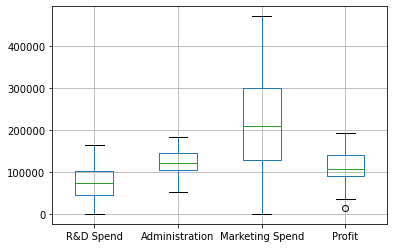

In [30]:
dataset.boxplot()

<AxesSubplot:xlabel='Profit'>

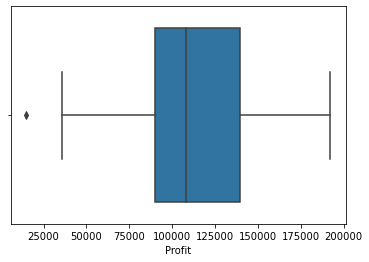

In [31]:
sns.boxplot(dataset["Profit"])

In [32]:
q1 = dataset["Profit"].quantile(0.25)

In [33]:
q1

90138.9025

In [34]:
q3 = dataset["Profit"].quantile(0.75)

In [35]:
q3

139765.97749999998

In [39]:
IQR = q3 - q1

In [40]:
IQR

49627.07499999998

In [41]:
lower_boundary = q1 - (1.5 * IQR)

In [42]:
lower_boundary

15698.290000000023

In [43]:
dataset[dataset["Profit"] < lower_boundary]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [44]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [45]:
gp_s = dataset.groupby("State")

In [46]:
gp_s.mean()["Profit"]

State
California    105350.278889
Florida       118774.024375
New York      112746.409375
Name: Profit, dtype: float64

In [47]:
gp_s.std()["Profit"]

State
California    43553.002886
Florida       35605.470428
New York      42271.224117
Name: Profit, dtype: float64

In [48]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [49]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### One Hot Encoding

In [50]:
dataset = pd.get_dummies(dataset, columns = ["State"] ,drop_first = True)

In [51]:
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0


### Linearity

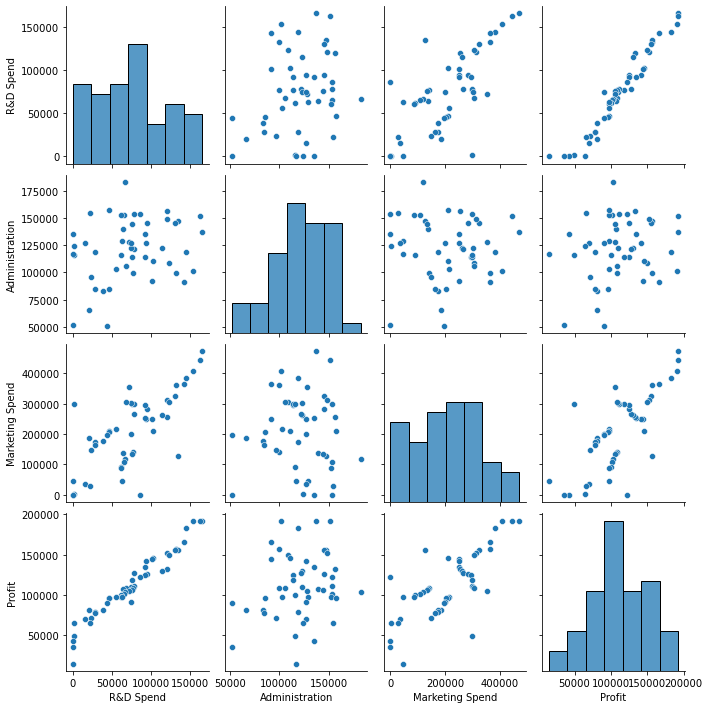

In [52]:
sns.pairplot(dataset, vars = ["R&D Spend","Administration","Marketing Spend","Profit"])

In [56]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.248629,0.728267,0.971896,0.136587,-0.012835
Administration,0.248629,1.000000,-0.030976,0.200717,0.010493,0.003258
Marketing Spend,0.728267,-0.030976,1.000000,0.745323,0.201275,-0.050080
Profit,0.971896,0.200717,0.745323,1.000000,0.116244,0.012615
State_Florida,0.136587,0.010493,0.201275,0.116244,1.000000,-0.470588
State_New York,-0.012835,0.003258,-0.050080,0.012615,-0.470588,1.000000


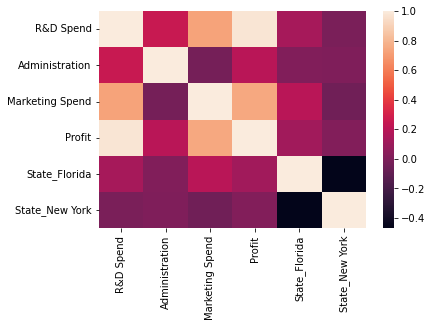

In [60]:
plt.figsize=(17,13)
sns.heatmap(dataset.corr())
plt.show()

In [54]:
dataset

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.200000,136897.80,471784.100000,192261.83,0,1
1,162597.700000,151377.59,443898.530000,191792.06,0,0
2,153441.510000,101145.55,407934.540000,191050.39,1,0
3,144372.410000,118671.85,383199.620000,182901.99,0,1
4,142107.340000,91391.77,366168.420000,166187.94,1,0
5,131876.900000,99814.71,362861.360000,156991.12,0,1
6,134615.460000,147198.87,127716.820000,156122.51,0,0
7,130298.130000,145530.06,323876.680000,155752.60,1,0
8,120542.520000,148718.95,311613.290000,152211.77,0,1
9,123334.880000,108679.17,304981.620000,149759.96,0,0


#### Multicollinearity

In [61]:
dataset.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
R&D Spend,1.000000,0.248629,0.728267,0.971896,0.136587,-0.012835
Administration,0.248629,1.000000,-0.030976,0.200717,0.010493,0.003258
Marketing Spend,0.728267,-0.030976,1.000000,0.745323,0.201275,-0.050080
Profit,0.971896,0.200717,0.745323,1.000000,0.116244,0.012615
State_Florida,0.136587,0.010493,0.201275,0.116244,1.000000,-0.470588
State_New York,-0.012835,0.003258,-0.050080,0.012615,-0.470588,1.000000


<AxesSubplot:>

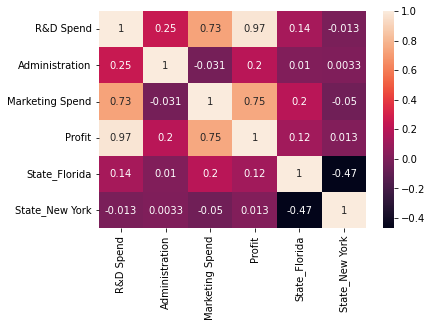

In [62]:
sns.heatmap(dataset.corr(), annot = True)

##### Split Target and Features

In [63]:
X = dataset.drop("Profit", axis = 1)

In [64]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.200000,136897.80,471784.100000,0,1
1,162597.700000,151377.59,443898.530000,0,0
2,153441.510000,101145.55,407934.540000,1,0
3,144372.410000,118671.85,383199.620000,0,1
4,142107.340000,91391.77,366168.420000,1,0
5,131876.900000,99814.71,362861.360000,0,1
6,134615.460000,147198.87,127716.820000,0,0
7,130298.130000,145530.06,323876.680000,1,0
8,120542.520000,148718.95,311613.290000,0,1
9,123334.880000,108679.17,304981.620000,0,0


In [65]:
y = dataset["Profit"]

##### Split data into train and test

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [69]:
X_train.shape

(40, 5)

In [70]:
X_test.shape

(10, 5)

In [124]:
# from sklearn.preprocessing import MinMaxScaler # class

In [125]:
# sc = MinMaxScaler() # init the min_max scaler #xmin, xmax

In [126]:
#fit caculate the range 
#transform -- transform the data 
# X_train = sc.fit_transform(X_train)

In [127]:
#transform -- transform the data according to train data ranges
# X_test = sc.transform(X_test)

### Building the MLR Model

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
mlr_model = LinearRegression()

In [73]:
#Train the model
mlr_model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [74]:
y_pred = mlr_model.predict(X_test)

In [75]:
y_pred

array([ 88215.54364167, 107149.68510205,  63321.06932581,  68887.77995052,
        45033.50923989, 114908.78960402, 174360.99489705,  97823.92686683,
       158119.16614691, 158501.07692141])

In [76]:
y_test

37     89949.14
23    108733.99
44     65200.33
42     71498.49
47     42559.73
20    118474.03
3     182901.99
30     99937.59
7     155752.60
6     156122.51
Name: Profit, dtype: float64

### Checking Linear Regression assumptions

In [77]:
error = y_test - y_pred

In [78]:
error

37    1733.596358
23    1584.304898
44    1879.260674
42    2610.710049
47   -2473.779240
20    3565.240396
3     8540.995103
30    2113.663133
7    -2366.566147
6    -2378.566921
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit', ylabel='Density'>

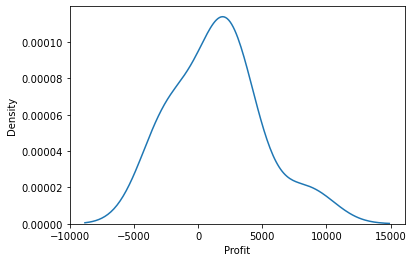

In [79]:
sns.kdeplot(error)

In [80]:
np.mean(error)

1480.8858303837776

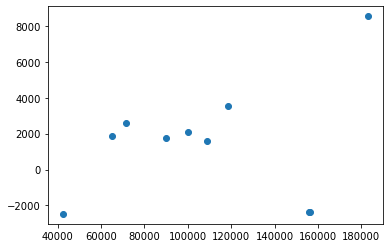

In [81]:
plt.scatter(y_test, error)

### Train

In [82]:
y_pred_train = mlr_model.predict(X_train)

In [83]:
error = y_train - y_pred_train

In [84]:
error

39    -1186.649033
2     10650.862375
40     5328.393545
32    -1136.599642
10    12682.550504
21    -5691.223160
35     5976.441611
27    -8744.904069
18    -2411.949197
31     -912.691828
1      3747.217067
12    14516.089052
34     9666.939009
45    17081.598274
26    -3084.705604
5     -7229.161774
13     8044.867353
22    -1560.525727
19     5353.962464
17    -4992.671800
14   -15212.688308
4     -4294.284777
41     5631.504036
33     1358.203983
24    -5778.572985
11     9491.098663
38    11833.833767
16    11590.571968
48   -14067.841375
46    -2482.930930
49   -31879.489432
8       -19.046426
43     9338.005767
29    -1465.324001
25     6225.509748
28     3688.407139
0      -682.404466
15   -15557.080449
36   -19480.532546
9     -4334.778798
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Profit', ylabel='Density'>

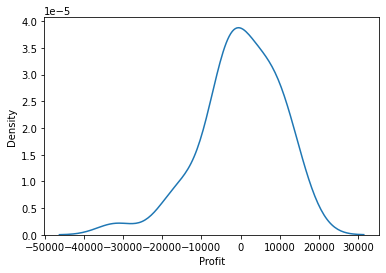

In [85]:
sns.kdeplot(error)

In [86]:
round(np.mean(error),2)

-0.0

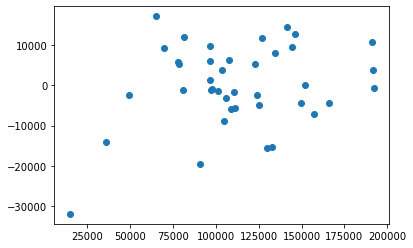

In [87]:
plt.scatter(y_train, error)

In [88]:
np.corrcoef(y_train, error)

array([[1.        , 0.25318624],
       [0.25318624, 1.        ]])

In [89]:
from sklearn.metrics  import mean_squared_error, mean_absolute_error, r2_score

In [90]:
mse = mean_squared_error(y_test, y_pred) 

In [91]:
mse

12336771.39125746

In [92]:
rmse = np.sqrt(mse)

In [93]:
rmse

3512.374039201614

In [94]:
mae = mean_absolute_error(y_test, y_pred) 

In [95]:
mae

2924.6682920260755

In [96]:
dataset["Profit"].mean()

112012.63920000002

In [97]:
np.set_printoptions(precision = 2, suppress = True)

In [98]:
X_train.head(2)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
39,38558.51,82982.09,174999.30,0,0
2,153441.51,101145.55,407934.54,1,0


In [99]:
mlr_model.coef_

array([   0.83,   -0.03,    0.02, -941.46, 1584.86])

In [100]:
mlr_model.intercept_

49362.74959976082

### r2_score

In [101]:
r2_score(y_test, y_pred)

0.9931997662580881

In [102]:
y_pred_train = mlr_model.predict(X_train)

In [103]:
mse = mean_squared_error(y_train, y_pred_train) 
rmse = np.sqrt(mse)
rmse

9916.212553898466

In [104]:
r2_score(y_train, y_pred_train)

0.9358967295767576

### Real time prediction

R & D Budget 50000
Marketing  40000
Adminstration 30000
State New York

Give the above information predict/estimate the Profit of the company

In [116]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [110]:
r_d_spend = 50000
marketing = 40000
admin = 30000
state = "New York"

In [111]:
#mlr_model

In [117]:
new_data = [[r_d_spend, admin, marketing, 0, 1]]

In [118]:
new_data

[[50000, 30000, 40000, 0, 1]]

In [120]:
mlr_model.predict(new_data)

array([92119.03])

In [121]:
import joblib

In [125]:
import os
os.getcwd()
os.chdir(r'C:\DS INTERNSHIP - Feb 2023\MLOPs\Productionize an ML Model')

In [126]:
os.getcwd()

'C:\\DS INTERNSHIP - Feb 2023\\MLOPs\\Productionize an ML Model'

In [127]:
joblib.dump(mlr_model,"profit_prediction.pkl")

['profit_prediction.pkl']

In [128]:
joblib 

<module 'joblib' from 'C:\\Users\\NAME\\anaconda3\\lib\\site-packages\\joblib\\__init__.py'>